In [20]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [21]:
nse_LSTM = np.load('LSTM/d_nse_LSTM.npy')
nse_DCNN = np.load('DCNN/d_dcnn_nse.npy')
nse_DCNN_pt = np.load('DCNN/d_dcnn_pt_nse.npy')
nse_DCNN_ps = np.load('DCNN/d_dcnn_ps_nse.npy')
nse_DCNN_p = np.load('DCNN/d_dcnn_p_nse.npy')
print(nse_DCNN_pt.shape)

(10, 20)


In [22]:
SMALL_SIZE=8; MEDIUM_SIZE=14; BIGGER_SIZE=18
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

## Ensemble for TCNN

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
20


<IPython.core.display.Javascript object>


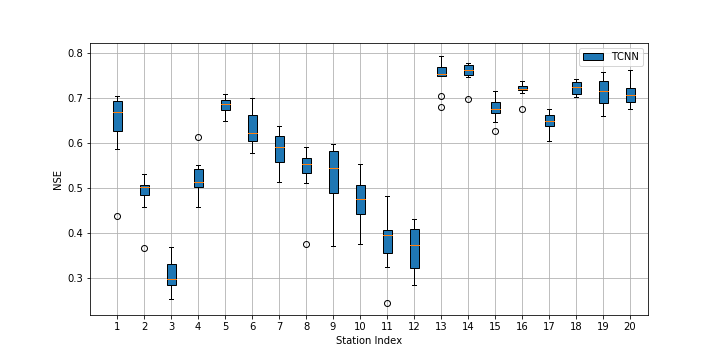

In [157]:
x_pos = np.array(range(1,21))
print(x_pos)
print(len(x_pos))
fig, ax = plt.subplots(figsize=(10,5))
bp1 = ax.boxplot(nse_DCNN, positions=x_pos*1.5+0.5, patch_artist=True, boxprops=dict(facecolor="C0"))
ax.legend([bp1['boxes'][0]],['TCNN'])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.xticks(x_pos*1.5+0.5, x_pos)
plt.xlim((0.5,31.5))
plt.xlabel('Station Index')
plt.ylabel('NSE')
# plt.title('Ensemble Results', fontweight='bold')
plt.savefig('TCNN-ensemble.eps', bbox_inches='tight', pad_inches=0)
plt.show()

## Ensemble for variables

[10258500 10259000 10259200 10343500 11141280 11143000 11148900 11162500
 11176400 11180500 11224500 11253310 11264500 11266500 11284400 11381500
 11451100 11475560 11522500 11528700]


<IPython.core.display.Javascript object>


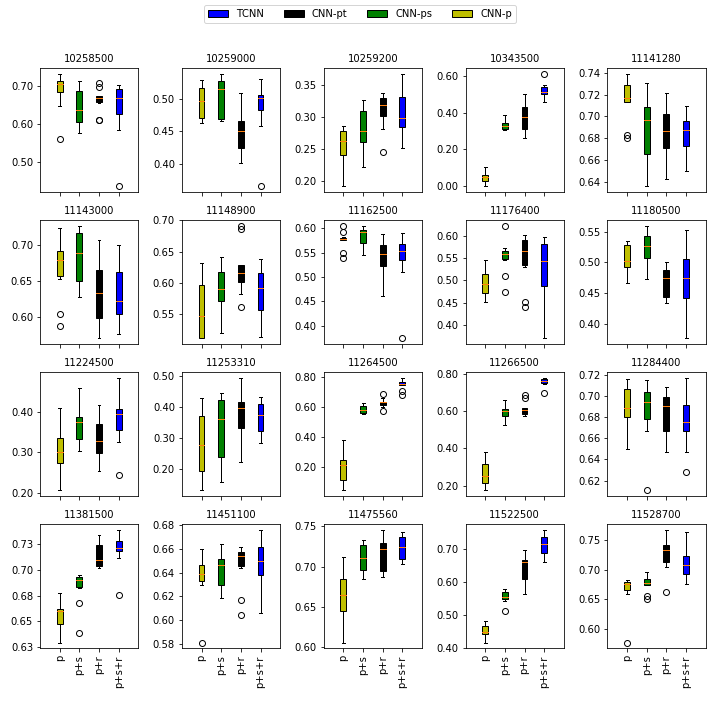

In [156]:
stations = np.load('../first-stations.npy')
print(stations)
plt.rcParams.update({'font.size':10})
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(10,10))
i = 0
for ax in axs.flat:
    bp1 = ax.boxplot(nse_DCNN[:,i], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="b"))
    bp2 = ax.boxplot(nse_DCNN_pt[:,i], positions=[1], patch_artist=True, boxprops=dict(facecolor="k"))
    bp3 = ax.boxplot(nse_DCNN_ps[:,i], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="g"))
    bp4 = ax.boxplot(nse_DCNN_p[:,i], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    ax.set_title(str(stations[i]))
    ax.set_xlim([-0.5, 2])
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels(['p', 'p+s', 'p+r', 'p+s+r'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.sca(ax)
    plt.xticks(rotation=90)

    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0]],
                 ['TCNN', 'CNN-pt', 'CNN-ps', 'CNN-p'], ncol=4, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

# fig.tight_layout()
plt.savefig('Ensemble-pst-compare.eps', bbox_inches='tight', pad_inches=0)
plt.show()

In [11]:
for i in range(20):
    print('ALL: ', np.mean(nse_DCNN[:,i]), ' p+s: ', np.mean(nse_DCNN_ps[:,i]), 
          ' p+t: ', np.mean(nse_DCNN_pt[:,i]))
    if (np.mean(nse_DCNN_ps[:,i])>np.mean(nse_DCNN_pt[:,i])):
        print('solar important')
    else:
        print('temperature important')

ALL:  0.6454358467113325  p+s:  0.6611942136129288  p+t:  0.6498822962813189
solar important
ALL:  0.5192578645905327  p+s:  0.5060533789209491  p+t:  0.46873671449975474
solar important
ALL:  0.2916388951889813  p+s:  0.2614933747841685  p+t:  0.3084617315819959
temperature important
ALL:  0.5230924730537956  p+s:  0.37396968748466675  p+t:  0.3942253423938715
temperature important
ALL:  0.6714580543791459  p+s:  0.7046541531076347  p+t:  0.6827692078729488
solar important
ALL:  0.617146918920026  p+s:  0.6474055226374457  p+t:  0.6290253023525688
solar important
ALL:  0.5874603516011324  p+s:  0.5787513263878143  p+t:  0.6183817318240521
temperature important
ALL:  0.541564061034976  p+s:  0.5852941587496935  p+t:  0.5138886948072455
solar important
ALL:  0.5367065763132393  p+s:  0.5202853468131021  p+t:  0.5755729088971637
temperature important
ALL:  0.454975520915099  p+s:  0.500242562286195  p+t:  0.47343423672825197
solar important
ALL:  0.39543577293029236  p+s:  0.369574284351

## time window

[10258500 10259000 10259200 10343500 11141280 11143000 11148900 11162500
 11176400 11180500 11224500 11253310 11264500 11266500 11284400 11381500
 11451100 11475560 11522500 11528700]


<IPython.core.display.Javascript object>


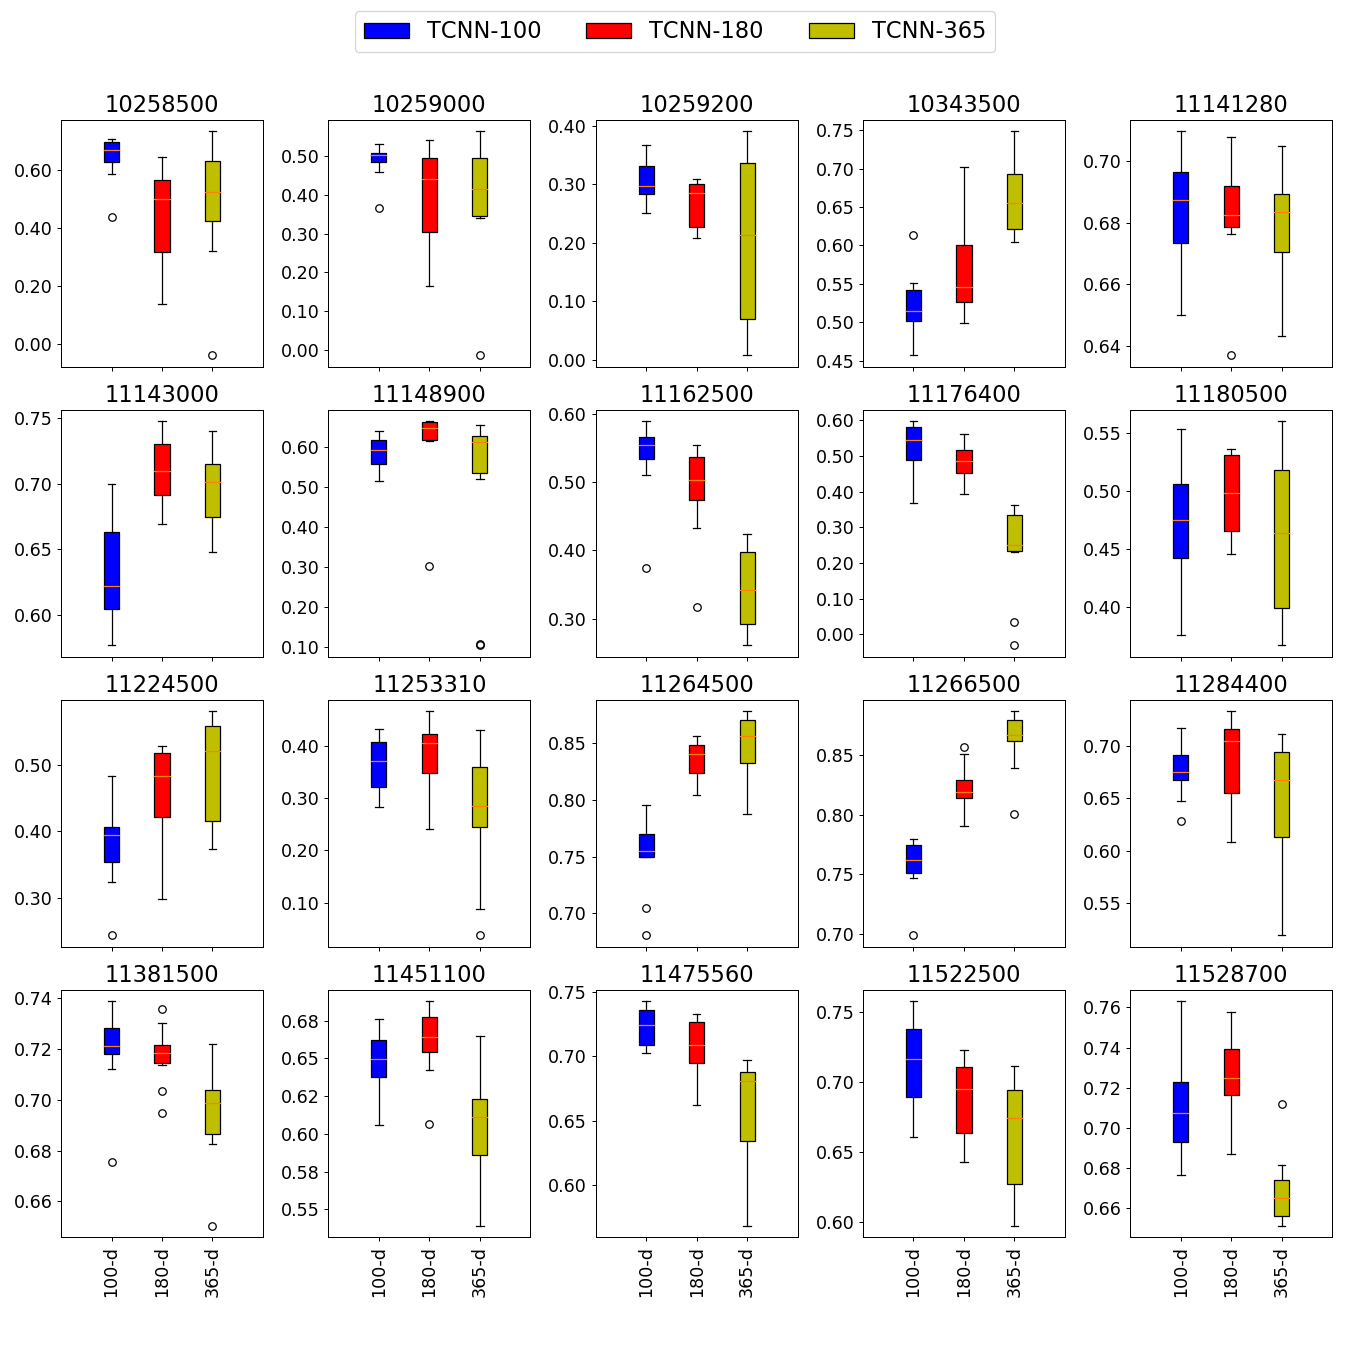

In [200]:
nse_365_DCNN = np.load('../time-window/DCNN/d_365_dcnn_nse.npy')
nse_180_DCNN = np.load('../time-window/DCNN/d_180_dcnn_nse.npy')
stations = np.load('../first-stations.npy')
print(stations)
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0
for ax in axs.flat:
    bp1 = ax.boxplot(nse_DCNN[:,i], positions=[0], patch_artist=True, boxprops=dict(facecolor="b"))
    bp2 = ax.boxplot(nse_180_DCNN[:,i], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="r"))
    bp3 = ax.boxplot(nse_365_DCNN[:,i], positions=[1.0], patch_artist=True, boxprops=dict(facecolor="y"))
    ax.set_title(str(stations[i]))
    ax.set_xlim([-0.5, 1.5])
    ax.set_xticks([0, 0.5, 1.0])
    ax.set_xticklabels(['100-d', '180-d', '365-d'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.sca(ax)
    plt.xticks(rotation=90)

    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]],
                 ['TCNN-100', 'TCNN-180', 'TCNN-365'], ncol=3, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

# fig.tight_layout()
plt.savefig('Ensemble-window-compare.eps', bbox_inches='tight', pad_inches=0)
plt.savefig('Ensemble-window-compare.png', bbox_inches='tight', pad_inches=0)
plt.show()

inc tendency:

11224500, 11264500, 11266500, 10343500, --> mountains. 

dec tendency: 

11475560, 11522500, 11381500, 11162500, 11176400, 

### Find the best time window

In [186]:
for i in range(20):
    print(stations[i])
    # print('100: ', np.max(nse_DCNN[:,i]), '180: ', np.max(nse_180_DCNN[:,i]), '365: ', 
    #      np.max(nse_365_DCNN[:,i]))
    maxx = np.max([np.max(nse_DCNN[:,i]), np.max(nse_180_DCNN[:,i]), np.max(nse_365_DCNN[:,i])])
    if maxx==np.max(nse_365_DCNN[:,i]):
        print('365')
    elif maxx==np.max(nse_180_DCNN[:,i]):
        print('180')
    else:
        print('100')

10258500
365
10259000
365
10259200
365
10343500
365
11141280
100
11143000
180
11148900
180
11162500
100
11176400
100
11180500
365
11224500
365
11253310
180
11264500
365
11266500
365
11284400
180
11381500
100
11451100
180
11475560
100
11522500
100
11528700
100


In [187]:
for i in range(20):
    print(stations[i])
    # print('100: ', np.max(nse_DCNN[:,i]), '180: ', np.max(nse_180_DCNN[:,i]), '365: ', 
    #      np.max(nse_365_DCNN[:,i]))
    maxx = np.max([np.average(nse_DCNN[:,i]), np.average(nse_180_DCNN[:,i]), np.average(nse_365_DCNN[:,i])])
    if maxx==np.average(nse_365_DCNN[:,i]):
        print('365')
    elif maxx==np.average(nse_180_DCNN[:,i]):
        print('180')
    else:
        print('100')

10258500
100
10259000
100
10259200
100
10343500
365
11141280
100
11143000
180
11148900
180
11162500
100
11176400
100
11180500
180
11224500
365
11253310
180
11264500
365
11266500
365
11284400
180
11381500
100
11451100
180
11475560
100
11522500
100
11528700
180


## 365-day Ensemble for TCNN

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
20


<IPython.core.display.Javascript object>


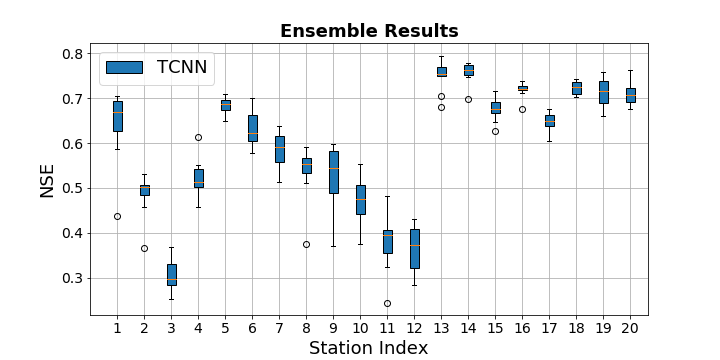

In [197]:
nse_365 = np.load('../time-window/DCNN/d_365_dcnn_nse.npy')
x_pos = np.array(range(1,21))
print(x_pos)
print(len(x_pos))
fig, ax = plt.subplots(figsize=(10,5))
bp1 = ax.boxplot(nse_DCNN, positions=x_pos*1.5+0.5, patch_artist=True, boxprops=dict(facecolor="C0"))
ax.legend([bp1['boxes'][0]],['TCNN'])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.xticks(x_pos*1.5+0.5, x_pos)
plt.xlim((0.5,31.5))
plt.xlabel('Station Index')
plt.ylabel('NSE')
plt.title('Ensemble Results', fontweight='bold')
plt.savefig('TCNN-365-ensemble.eps', bbox_inches='tight', pad_inches=0)
plt.savefig('TCNN-365-ensemble.png', bbox_inches='tight', pad_inches=0)
plt.show()

## 365-day ensemble for variables

[10258500 10259000 10259200 10343500 11141280 11143000 11148900 11162500
 11176400 11180500 11224500 11253310 11264500 11266500 11284400 11381500
 11451100 11475560 11522500 11528700]


<IPython.core.display.Javascript object>


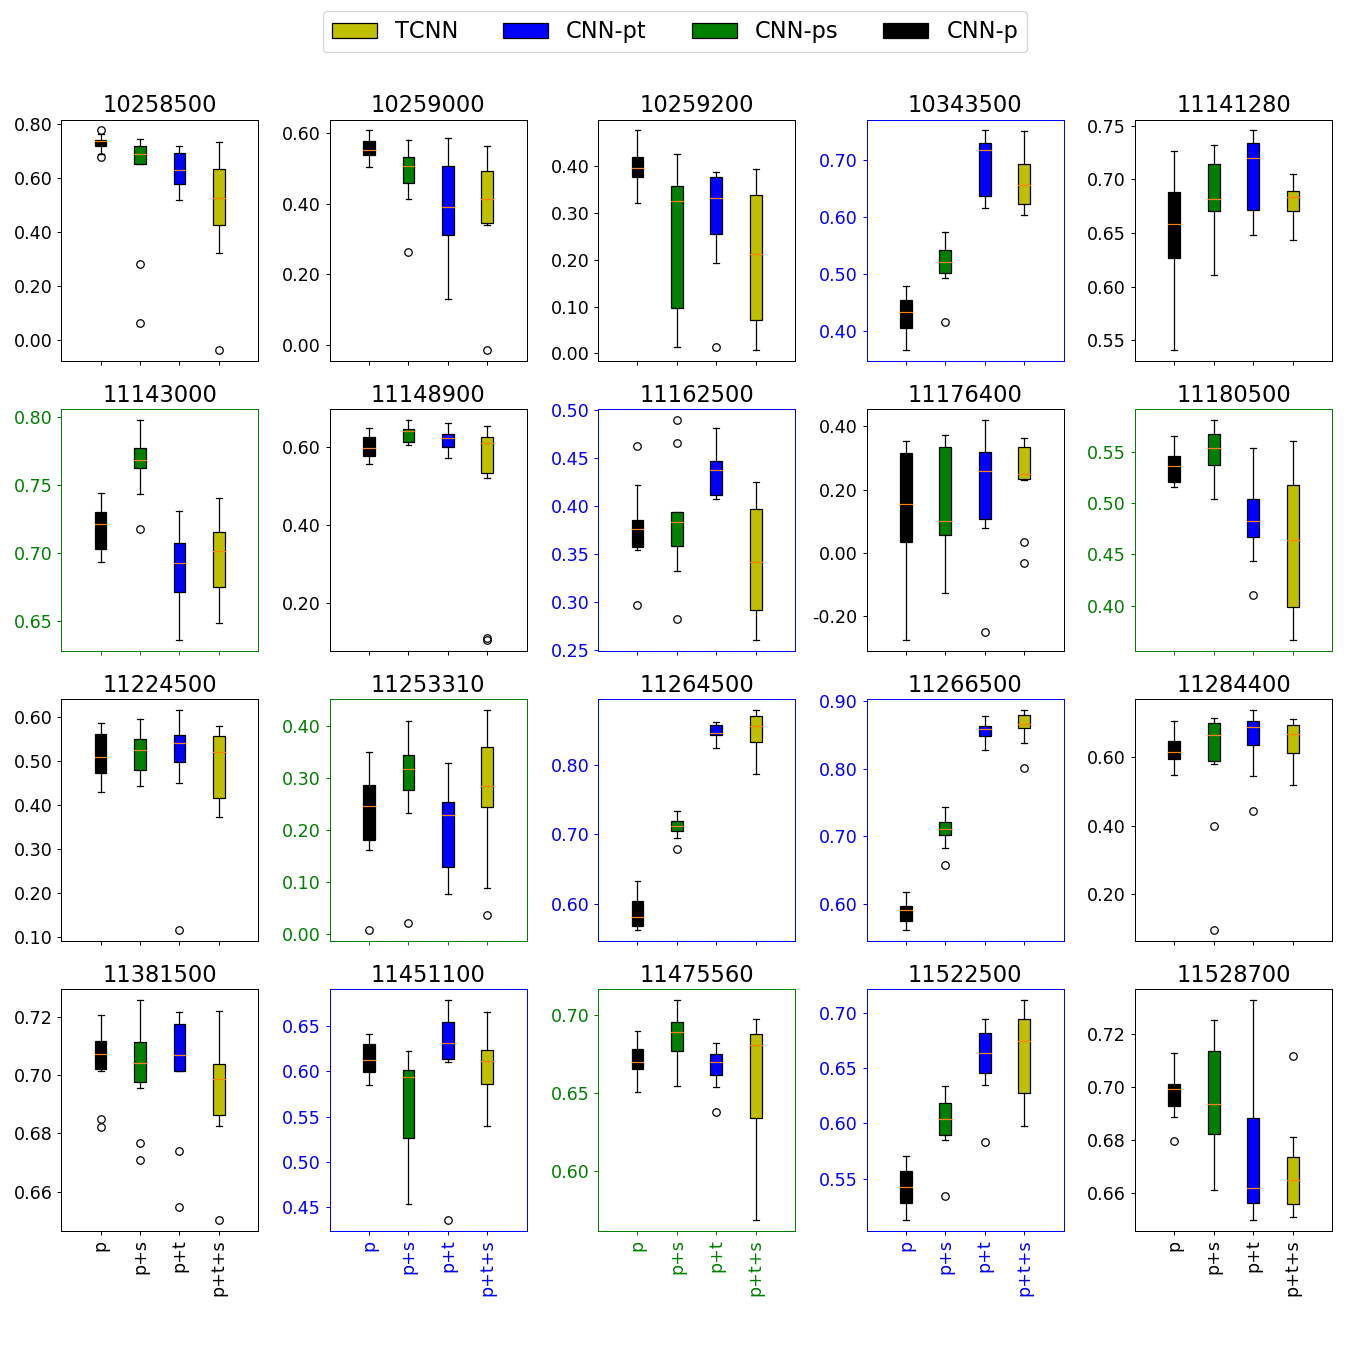

In [209]:
stations = np.load('../first-stations.npy')
print(stations)
plt.rcParams.update({'font.size':10})
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0
nse_DCNN_365_pt = np.load('../time-window/DCNN/d_dcnn_365_pt_nse.npy')
nse_DCNN_365_ps = np.load('../time-window/DCNN/d_dcnn_365_ps_nse.npy')
nse_DCNN_365_p = np.load('../time-window/DCNN/d_dcnn_365_p_nse.npy')
ps_ind = [5, 9, 11, 17]
pt_ind=[3, 7, 12, 13, 16, 18]
for ax in axs.flat:
    bp1 = ax.boxplot(nse_365_DCNN[:,i], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = ax.boxplot(nse_DCNN_365_pt[:,i], positions=[1], patch_artist=True, boxprops=dict(facecolor="b"))
    bp3 = ax.boxplot(nse_DCNN_365_ps[:,i], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="g"))
    bp4 = ax.boxplot(nse_DCNN_365_p[:,i], positions=[0], patch_artist=True, boxprops=dict(facecolor="k"))
    ax.set_title(str(stations[i]))
    ax.set_xlim([-0.5, 2])
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels(['p', 'p+s', 'p+t', 'p+t+s'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.sca(ax)
    plt.xticks(rotation=90)
    if i in ps_ind:
        ax.tick_params(color='green', labelcolor='green')
        for spine in ax.spines.values():
            spine.set_edgecolor('green')
    if i in pt_ind:
        ax.tick_params(color='blue', labelcolor='blue')
        for spine in ax.spines.values():
            spine.set_edgecolor('blue')
    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0]],
                 ['TCNN', 'CNN-pt', 'CNN-ps', 'CNN-p'], ncol=4, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

# fig.tight_layout()
plt.savefig('Ensemble-pst-compare.eps', bbox_inches='tight', pad_inches=0)
plt.savefig('Ensemble-pst-compare.png', bbox_inches='tight', pad_inches=0)
plt.show()

Temperature: 10343500, 11162500, 11264500, 11266500, 11451100, 11522500. mountain area, far from coastline except 11162500, 11522500

Solar radiation: 11143000, south california close to sea. 11180500 Fremont. 11475560 norcal costal. 11253310 inland

## 365 for different MLs

In [23]:
lstm_365 = np.load('../time-window/LSTM/d_365_nse_LSTM.npy')
dcnn_365 = np.load('../time-window/DCNN/d_365_dcnn_nse.npy')
gru_365 = np.load('../time-window/GRU/d_365_nse_GRU.npy')
ann_365 = np.load('../time-window/ANN/d_365_nse_ANN.npy')
linear_365 = np.load('NSE_linear.npy')

[10258500 10259000 10259200 10343500 11141280 11143000 11148900 11162500
 11176400 11180500 11224500 11253310 11264500 11266500 11284400 11381500
 11451100 11475560 11522500 11528700]


<IPython.core.display.Javascript object>


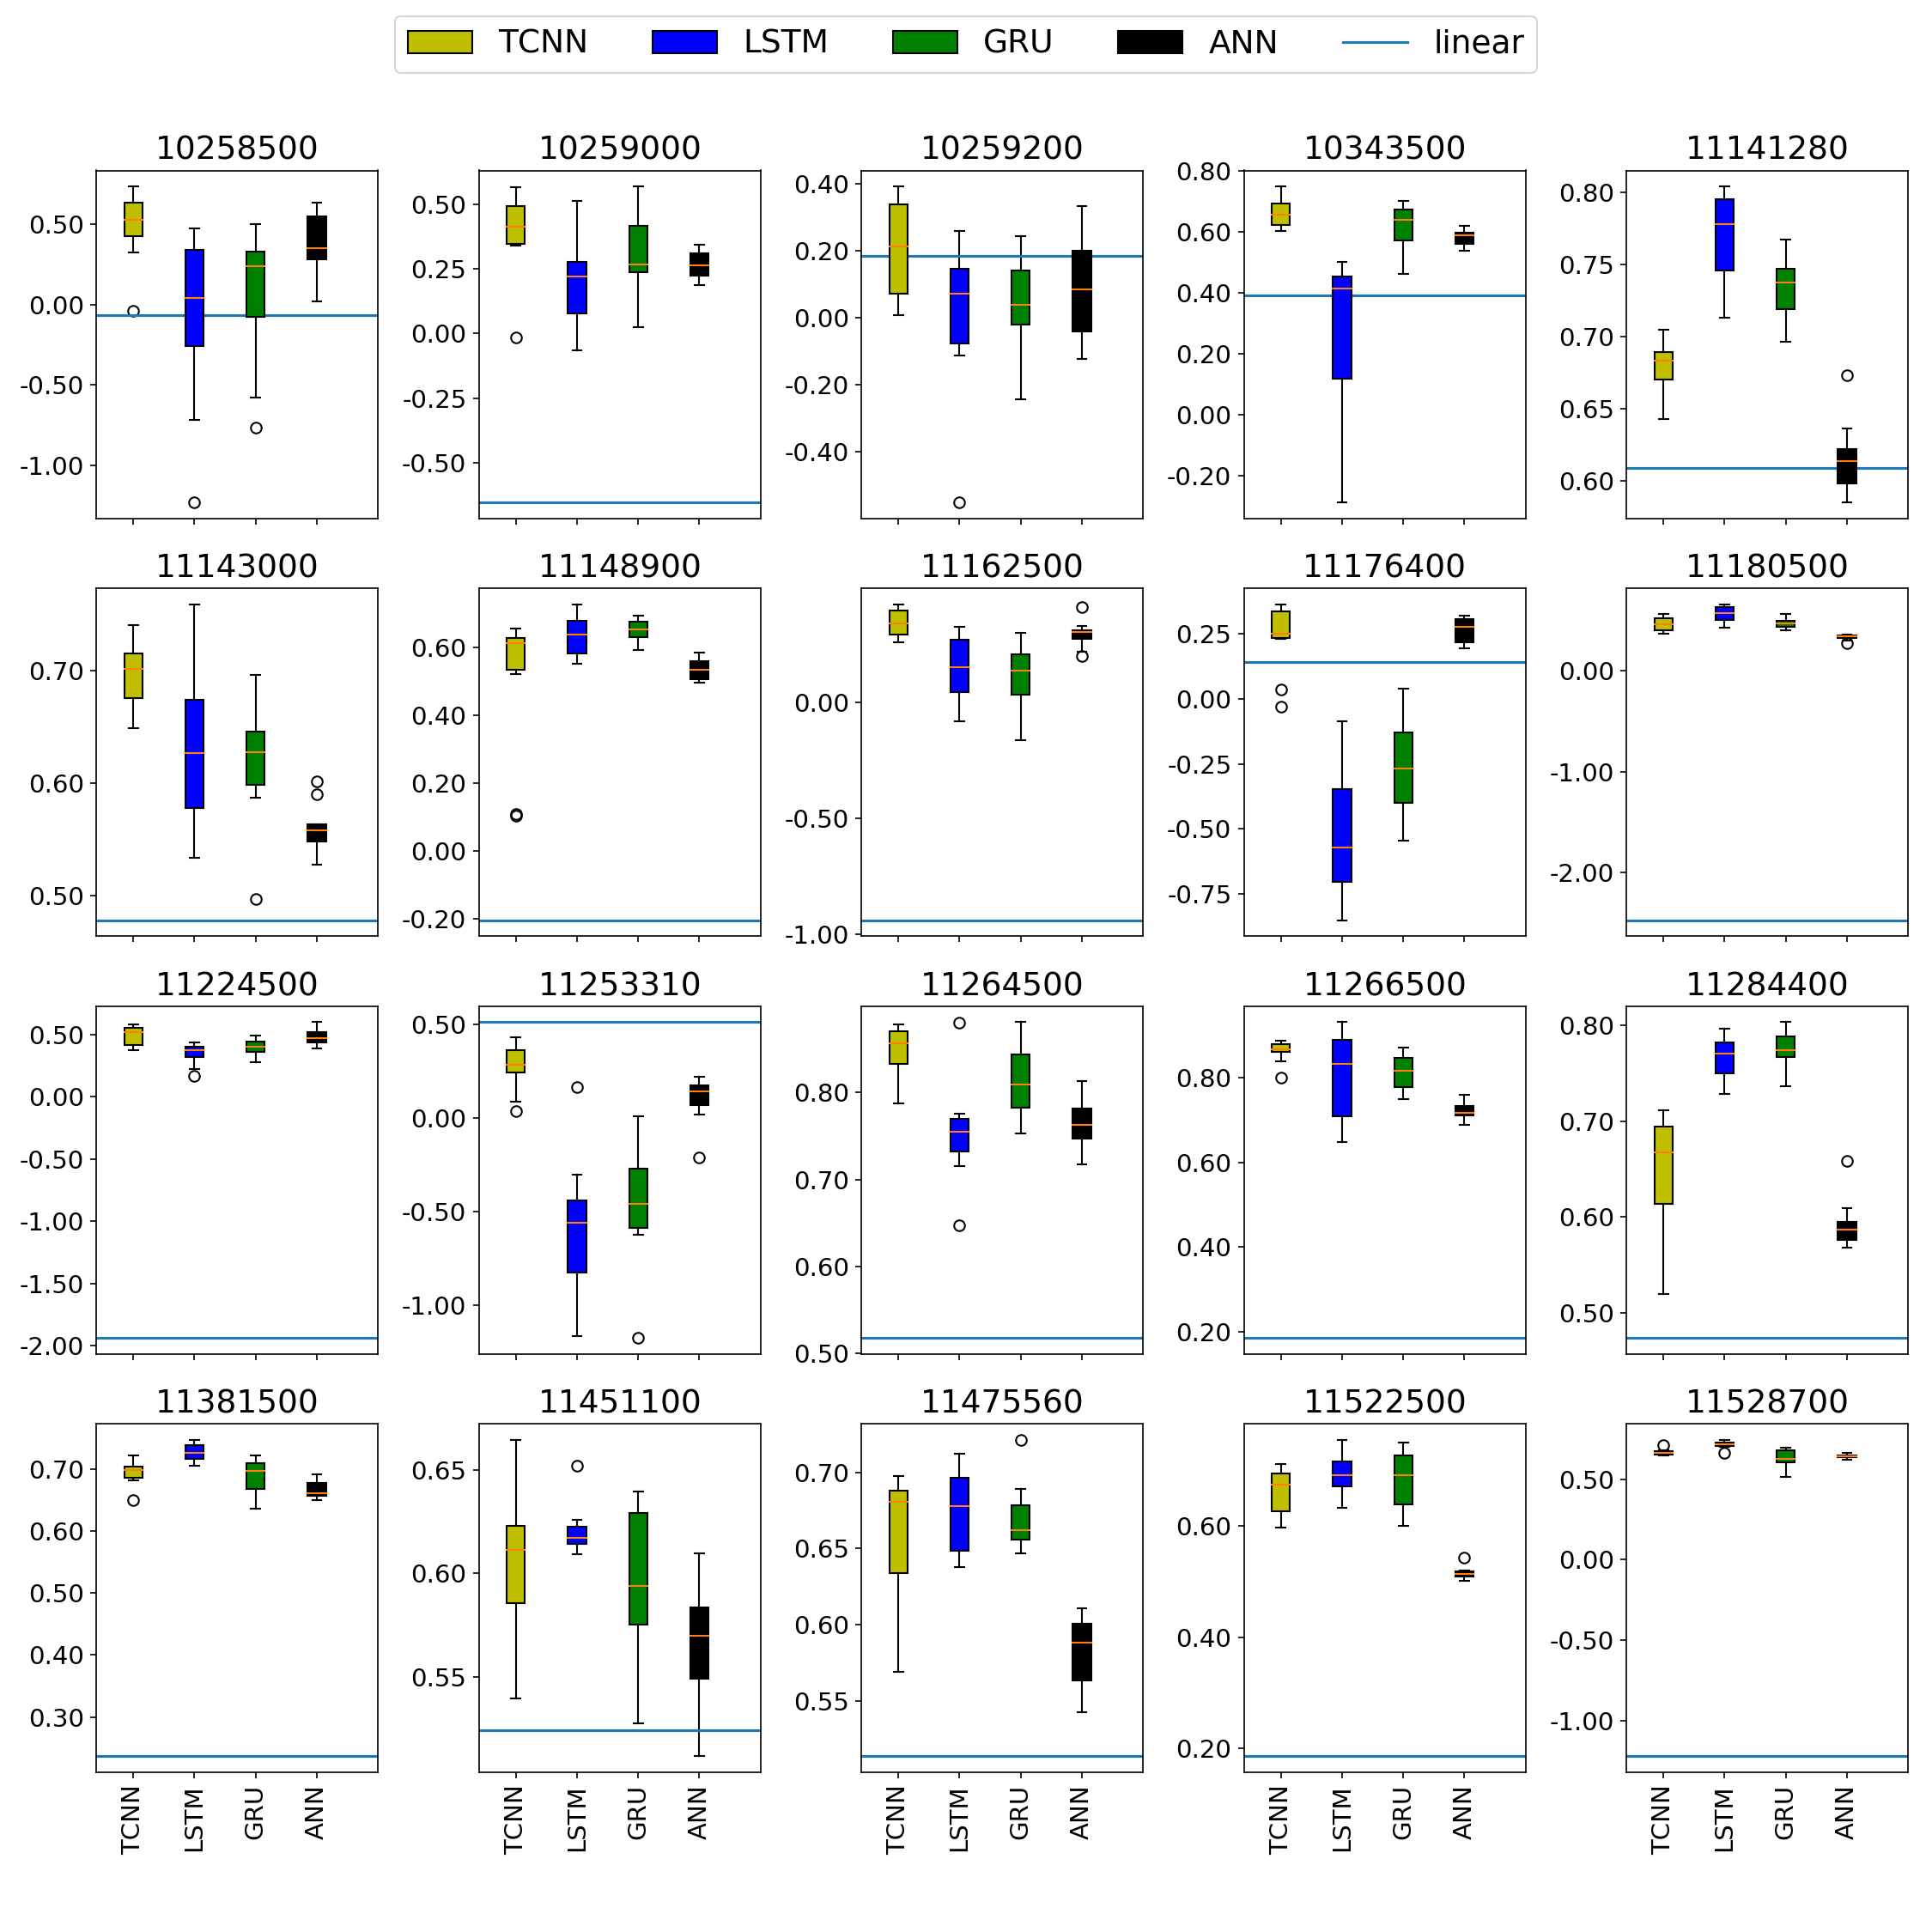

In [24]:
stations = np.load('../first-stations.npy')
print(stations)
plt.rcParams.update({'font.size':10})
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0

for ax in axs.flat:
    bp1 = ax.boxplot(dcnn_365[:,i], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = ax.boxplot(lstm_365[:,i], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    bp3 = ax.boxplot(gru_365[:,i], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
    bp4 = ax.boxplot(ann_365[:,i], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="k"))
    line = plt.axhline(y=linear_365[i])
    ax.set_title(str(stations[i]))
    ax.set_xlim([-0.3, 2])
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels(['TCNN','LSTM','GRU','ANN'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.sca(ax)
    plt.xticks(rotation=90)
    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0], line],
                 ['TCNN', 'LSTM','GRU','ANN', 'linear'], ncol=5, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.savefig('Ensemble-model-compare.eps', bbox_inches='tight', pad_inches=0)
plt.savefig('Ensemble-model-compare.png', bbox_inches='tight', pad_inches=0)
plt.show()